<a href="https://colab.research.google.com/github/dhsilva2912/MIT_ComputerVision/blob/main/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # numerical computing library
import matplotlib.pyplot as plt # plotting library

In [ ]:
# create some random data
np.random.seed(0) # set random seed for reproducibility
Ndatapoints = 100
x = np.random.randn(Ndatapoints,1)
y = 0.5*x**2 + 0.2*np.random.randn(Ndatapoints,1)

In [ ]:
# implement a neural net with forward and backward functions
class Linear():
  def __init__(self, N, M): # N is dimensionality of the input, M is dimensionality of the output
    self.N = N
    self.M = M
    self.W = np.random.randn(M, N)
    self.b = np.random.randn(M,1)
    self.x_in = np.zeros((N,1))
    self.x_out = np.zeros((M,1))
  def forward(self, x):
    self.x_in = x
    self.x_out = np.matmul(self.W,self.x_in) + self.b
    return self.x_out
  def backward(self): # returns dLdx, x_in, dLdb
    return self.W, self.x_in, np.eye(self.M)

class Relu():
  def __init__(self, dim):
    self.x_in = np.zeros((dim,1))
    self.x_out = np.zeros((dim,1))
  def forward(self, x):
    self.x_in = x
    self.x_out = np.maximum(self.x_in,0)
    return self.x_out
  def backward(self): # returns dLdx
    return np.diag((self.x_in>=0).astype(np.float32)[:,0])

class Net():
  def __init__(self, in_dim, hid_dim, out_dim, lr=0.0001):
    self.l1 = Linear(in_dim, hid_dim)
    self.r1 = Relu(hid_dim)
    self.l2 = Linear(hid_dim, hid_dim)
    self.r2 = Relu(hid_dim)
    self.l3 = Linear(hid_dim, out_dim)

    self.layers = [self.l1, self.r1, self.l2, self.r2, self.l3]

    self.lr = lr # learning rate

  def forward(self, x):
    x_in = x
    for layer in self.layers:
      x_out = layer.forward(x_in)
      x_in = x_out.copy()
    y = x_out
    return y
  
  def backward(self, dLdout):

    for layer in self.layers[::-1]:
      
      if isinstance(layer, Linear):

        # compute gradients for the layer
        doutdin, x_in, doutdb  = layer.backward()
        dLdin = np.matmul(dLdout, doutdin)
        dLdW = np.matmul(x_in, dLdout)
        dLdb = np.matmul(dLdout, doutdb)

        # take a gradient step
        layer.W -= self.lr*np.transpose(dLdW)
        #layer.b -= self.lr*np.transpose(dLdb)

      elif isinstance(layer, Relu):
        doutdin = layer.backward()
        dLdin = np.matmul(dLdout, doutdin)
      
      else: print('unrecognized layer type')
      
      # move on to next layer
      dLdout = np.copy(dLdin)

In [ ]:
# instantiate a net
net = Net(1,128,1,0.0001)

In [ ]:
# plot the data
def plot_data(x,y):
  plt.plot(x, y, 'o', markersize=5)
  plt.axis('equal')
  plt.xlabel('x')
  plt.ylabel('y')

# plot the mapping the net performs over some interval
def plot_net(net):
  x_grid = np.expand_dims(np.arange(np.floor(np.min(x)),np.ceil(np.max(x)),0.1), axis=1)
  y_grid = np.zeros_like(x_grid)

  for i in range(y_grid.shape[0]): # produce y = f(x) for each x
    y_grid[[i]] = net.forward(x_grid[[i]])
  plt.plot(x_grid, y_grid)
  plt.xlabel('x')
  plt.ylabel('f(x)')

Total loss: 11831.66
Total loss: 7850.37
Total loss: 6232.94
Total loss: 5458.43
Total loss: 4990.65
Total loss: 4641.24
Total loss: 4344.08
Total loss: 4075.84
Total loss: 3827.99
Total loss: 3597.06


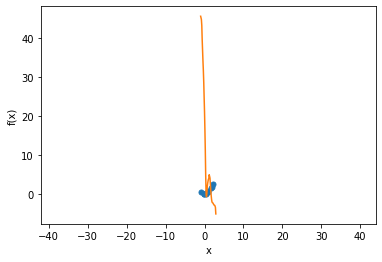

In [ ]:
# fit the net to the data, using backprop
Nepochs = 10
for b in range(Nepochs):
  J = 0
  for i in range(x.shape[0]):
    y_pred = net.forward(x[[i]])
    L = ((y_pred-y[i])**2) # mse loss
    J += L[0,0]
    dLdy_pred = 2*(y_pred-y[i])
    net.backward(dLdy_pred)
  if (b % 1)==0: print('Total loss: {:1.2f}'.format(J))

# plot
plot_data(x,y)
plot_net(net)

In [ ]:
# additional exercises
# 1. add weight decay or dropout to regularize the network
# 2. rewrite the training using different sized batches to compute each gradient update
# 3. define a new layer type (e.g., softmax, L2-norm, etc) and write the backprop update for it